<a href="https://colab.research.google.com/github/AlvearVanessa/TFM/blob/main/Preprocesado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo final de máster: Predicción de la edad a partir del estado de la retina mediante técnicas de aprendizaje profundo
---


#Introducción
---

El siguiente notebook hace parte de una secuencia de los mismos que nos van a permitir construir el trabajo final de máster.

Este es el notebook 1. El objetivo es visualizar, comprender y analizar un conjunto de datos de imágenes de fondo de ojo tomadas a pacientes de un hospital. Teniendo esto en mente, se realiza un preprocesado de los datos y se obtienen los conjuntos de training y testing para emplearlos en la creación de diferentes modelos de Aprendizaje profundo que se realiza en los siguientes notebooks.


#Autora
---

Este trabajo es realizado por:

- Mayra Vanessa Alvear Gallón

#Objetivo
---


El objetivo del trabajo de fin de máster es crear un modelo de regresión en imágenes utilizando técnicas de Aprendizaje profundo. 

El problema que se quiere resolver es de regresión, esto es, a partir de una imagen de fondo de ojo de una persona, se quiere predecir su edad.

Para ello, se van a crear once notebooks:

1) Análisis de los datos y un preprocesado.

2) hasta 10) En los cuatro siguientes se hará la implementación de cuatro modelos distintos de Aprendizaje Profundo.

11) En el último, se hará un *Ensemble.* 


Para crear los modelos se utiliza la librería [fastAI](https://www.fast.ai/) entre otras librerías que permiten el desarrollo del trabajo.

## Librerías
---


Para iniciar, se descarga la última versión de la librería FastAI. Al finalizar la instalación, se debe reiniciar el kernel (menú Entorno de ejecución -> Reiniciar Entorno de ejecución).

In [ ]:
!pip install fastai -Uq

     |████████████████████████████████| 197 kB 5.4 MB/s 
     |████████████████████████████████| 60 kB 6.1 MB/s 


Se cargan aquellas librerías que son necesarias.

In [ ]:
# models and depp learning library
from fastai.vision.all import *

# preprocessing and data management
import scipy.io
import pandas as pd
from datetime import datetime, timedelta

#Split dataset
from sklearn.model_selection import train_test_split

# model evaluation
from fastai.metrics import mae

## Análisis de datos
---

### Dataset
---

**El conjunto de datos**

Contiene imágenes de fondo de ojo con etiquetas de edad para entrenamiento. Estas imágenes son de tamaño 299x299, algunas son del ojo izquierdo y otras del ojo derecho, esto se puede visualizar a partir de la ubicación del disco óptico

In [ ]:
from IPython.display import Image

**Ojo izquierdo**

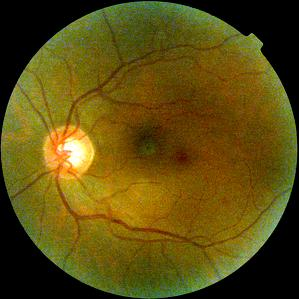

In [ ]:
Image("/content/imagen1.jpg")

**Ojo derecho**

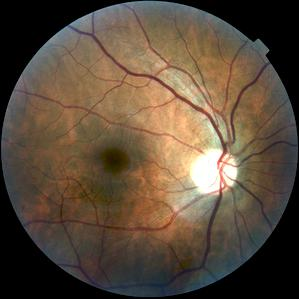

In [ ]:
Image("/content/imagen2.jpg")

Este dataset fue creado a partir de datos reales y contiene dos campos:`nombre_foto` y `edad`. En total son 444.861 imágenes de fondo de ojo. En formato **jpg extenderlo**

Para considerar una muestra considerable de los datos, se realizó un proceso de estratificación, que se verá con más detalle. 



Para la realización de este trabajo se utiliza el GPU que ofrece Google Colab. 

Los campos del dataset son:

**nombre_foto:** Contiene el nombre del archivo que en este caso es una imagen en formato jpg.

**edad:** Edad en años de la persona a la que se le ha tomado la foto.


**Cabe mencionar que los datos del campo `edad` son nuestra variable objetivo.**

Por ende, a partir del dataframe se quieren construir los conjuntos de training y testing, pero, con el fin, de que ambos conjuntos, sean muestras representativas del dataset, se busca que tengan la misma distribución del datos, es decir, ambos conjuntos se quieren estratificados.

Para ello, se utilizó el método `train_test_split` de la librería scikit-learn con el **argumento** stratify, sin embargo, se genera un error porque hay edades en las cuales, sólo hay un valor y como se quieren distribur los datos a dos conjuntos, esto no es posible. 

No obstante, se utiliza este método con valor None y se observa en el histograma del conjunto de train y de test, una distribución de los datos muy similar a los datos originales. 

Por tal motivo, se consideran las particiones de los conjuntos realizadas por este método sin recurrir a estratificar los datos. 

Por último, se quieren guardar las imágenes de los dataframes que se van a denominar *dfTrain* y *dfTest*. Teniendo esto en mente, se deben cargar los archivos de las imágenes originales 444 mil imágenes, y extraer un porcentaje para training y otro para testing.


Por razones de memoria y para evitar cargar el dataset de las 444 mil imágenes, en este intento, este proceso tomó muchas horas de ejecución e incluso, el ordenador colapsa y se debe reiniciar en muchas ocasiones, se decide realizar este proceso de forma local y conseguir una muestra representativa de los datos, de tal forma que, esta muestra tenga aproximadamente 43 mil datos, de los cuales 35 mil son para training y 8mil para testing.

Finalmente, se obtienen los datasets con los archivos de training y split y se pueden cargar las imágenes. Para el conjunto de test están todas las imágenes pero para el conjunto de training no se guardaron 3 de estas imágenes. 

Por lo que, se pasa a revisar los dataframes finales que se obtuvieron de forma local y se eliminan estas 3 imágenes. 

En este orden de ideas, dado que los archivos se encuentra en una carpeta de Google Drive, se carga para acceder a los archivos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Se explora el contenido de este conjunto de datos. Para ello, se crea un objeto [Path](https://docs.python.org/3/library/pathlib.html) que apunta al directorio que acabamos de crear. 

`path` es la carpeta que contiene todas las carpetas del trabajo

In [ ]:
path = Path('/content/drive/MyDrive/dataset_retina/')

`pathDataframes` es la carpeta que contiene todos los ficheros de anotación

In [ ]:
pathDataframes = Path('/content/drive/MyDrive/dataset_retina/dataframes')

`pathDatasets` es la carpeta que contiene las carpetas con los archivos de los conjuntos de datos de *test* y *train*. Por lo tanto, contiene las carpetas `train` y `test`

In [ ]:
pathDatasets = Path('/content/drive/MyDrive/dataset_retina/datasets')

Con el objeto path se pueden utilizar funciones como `ls()`.

In [ ]:
path.ls()

(#8) [Path('/content/drive/MyDrive/dataset_retina/dataframes.zip'),Path('/content/drive/MyDrive/dataset_retina/original_test.zip'),Path('/content/drive/MyDrive/dataset_retina/original_train.zip'),Path('/content/drive/MyDrive/dataset_retina/nuevo_testing.zip'),Path('/content/drive/MyDrive/dataset_retina/nuevo_training.zip'),Path('/content/drive/MyDrive/dataset_retina/Notebooks'),Path('/content/drive/MyDrive/dataset_retina/dataframes.zip (Unzipped Files)'),Path('/content/drive/MyDrive/dataset_retina/dataframes')]

Se puede ver en el contenido del path seis archivos

1.   etiquetas_edad.csv
2.   La carpeta new_training
3.   train.csv
4.   La carpeta new_testing
5.   El notebook Analisis0_dataset_final.ipynb
6.   La carpeta train_and_test_dinal





In [ ]:
(path/'dataframes').ls()

(#5) [Path('/content/drive/MyDrive/dataset_retina/dataframes/test.csv'),Path('/content/drive/MyDrive/dataset_retina/dataframes/sample_df.csv'),Path('/content/drive/MyDrive/dataset_retina/dataframes/train.csv'),Path('/content/drive/MyDrive/dataset_retina/dataframes/etiquetas_edad_con_archivo.csv'),Path('/content/drive/MyDrive/dataset_retina/dataframes/etiquetas_edad.csv')]

La carpeta `dataframes` contiene archivos en formato csv. 



## Preprocesado

A continuación se van a realizar el *data_cleaning* y el análisis de los datos.

**0. Analizamos el dataframe**

Los siguientes comandos cargan el conjunto de datos.  

In [ ]:
df = pd.read_csv(pathDataframes/'etiquetas_edad_con_archivo.csv', sep=',')

Se visualizan las primeras 5 instancias del dataset y las 5 últimas


In [ ]:
df.head()

,nombre_foto,edad
0,anonymized_846.jpg,54
1,anonymized_847.jpg,54
2,anonymized_848.jpg,54
3,anonymized_868.jpg,59
4,anonymized_1033.jpg,58


In [ ]:
df.tail()

,nombre_foto,edad
444760,anonymized_644484.jpg,56
444761,anonymized_253985.jpg,70
444762,anonymized_253984.jpg,70
444763,anonymized_239167.jpg,20
444764,anonymized_239168.jpg,20


In [ ]:
print('Retina dataframe shape:', df.shape)


Retina dataframe shape: (444765, 2)


Este dataframe contiene 444765 filas y 2 columnas. 


Se verifica si el dataframe df contiene datos nulos, erróneos, NaN o vacíos

In [ ]:
#Verifica si el df tiene datos nulos o vacíos
df.isnull().sum() 

nombre_foto    0
edad           0
dtype: int64

Es importante conocer una estadística de los datos del df

In [ ]:
df.describe()

,edad
count,4.447650e+05
mean,1.644584e+02
std,4.465722e+04
min,0.000000e+00
25%,4.000000e+01
50%,5.200000e+01
75%,6.300000e+01
max,2.802198e+07


De acuerdo a la descripción anterior, no es clara la estadística producida, esto se debe a que el dataframe puede contener datos erróneos, tipo NaN o la información contiene valores extremos, entre otros factores. Para ello estudiaremos los campos `edad` y `nombre_foto`.

Se realiza una copia del dataframe para no modificar los datos iniciales

In [ ]:
df2 = df[['nombre_foto', 'edad']].copy()

Se analiza el tipo de dato para cada campo









In [ ]:
print("El tipo de dato del campo nombre_foto es: ", df2['nombre_foto'].dtype)
print("El tipo de dato del campo edad es: ", df2['edad'].dtype)

El tipo de dato del campo nombre_foto es:  object
El tipo de dato del campo edad es:  int64


En el campo `nombre_foto` los datos son de tipo object y en `edad` son de tipo entero.

También, se puede visualizar mediante un histograma cómo están distribuidos los datos del campo `edad` 

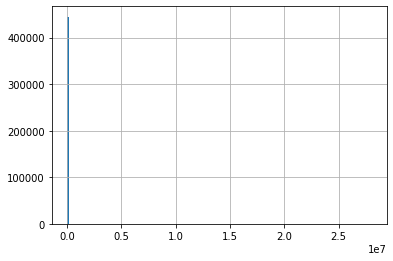

In [ ]:
hist_age = df2['edad'].hist(bins=df2['edad'].nunique())

Se puede observar que no se presenta una buena representación de los datos. Hay un punto de acumulación de datos en el valor 0. Para analizar mejor este comportamiento, se realiza un preprocesado de los datos 

**1. Data cleaning**

En este paso, se quiere revisar con detalle si hay datos que se repiten en la columna `nombre_foto`, si los datos de la columna `edad` tienen mucho sentido en la realidad, por ejemplo, si se tienen datos negativos o si son números muy alto, si en ambas columnas hacen falta datos, si hay erróneos, tipo NaN o vacíos, ver si hay outliers, finalmente se revisa si algunos datos deben eliminarse, entre otras características.

Se verifica si el dataframe df contiene datos nulos, erróneos, NaN o vacíos

In [ ]:
#Verifica si el df tiene datos nulos o vacíos
df2.isnull().sum() 

nombre_foto    0
edad           0
dtype: int64

Se puede ver, que este dataset no tiene valores nulos, erróneos o NaN. Además, es importante verficiar si existen imágenes con el mismo nombre, es decir, duplicadas, y esto se puede observar en la campo `nombre_foto`. Por lo tanto, se estudia si tiene instancias repetidas.



In [ ]:
dup_values = df2.duplicated(subset=['nombre_foto'],keep=False )

In [ ]:
dup_values.sum()

100

En efecto, hay 100 datos duplicados en este campo. Se procede a eliminarlos

In [ ]:
df2 = df2[~dup_values]

Se verifica que no hayan quedado datos duplicados

In [ ]:
df2.duplicated(keep=False).sum()

0

Una característica importante para que el campo `edad` tenga sentido en la realidad, es que no existen edades negativas, de esta manera, se revisa que el dataset no tenga datos negativos en este campo, además se observa el dato máximo y mínimo

In [ ]:
(df2['edad']<0).sum()

0

In [ ]:
print("Edad mínima del dataset = ", df2['edad'].min())
print("Edad máxima del dataset = ", df2['edad'].max())


Edad mínima del dataset =  0
Edad máxima del dataset =  28021979


En efecto, no tiene datos negativos. No obstante, se observa que la edad mínima es 0 años y la máxima es 28021979 años. Ahora bien, se puede ver con más detalle los valores de las edades y cuántos datos hay para cada edad

In [ ]:
age_counts = df2['edad'].value_counts()
age_counts

50          11459
52          11361
51          10973
49          10962
55          10923
            ...  
574             1
152             1
28021979        1
956             1
560             1
Name: edad, Length: 179, dtype: int64

Como se pudo observar, hay edades que son, un sólo dato, además, hay edades como 574 años y 28021979 años, así pues, se va a revisar esto para darle un sentido más real a los datos, se recuerda que son datos reales de personas. 

**3.** No se eliminan registros que no tienen información de edad, porque todos los datos de esta columna están completos.

**4.** Se observan edades de 574 años e incluso de 28021979 años. Dado que estos valores son atípicos en los que se consideran edades biólogicas de las personas, entonces se restringe la edad para valores positivos entre 0 años y 100 años. Porque consideramos que son los valores en promedio de la edad biológica de un paciente. 

Por lo tanto, también se eliminan los datos de las imágenes con más de 100 años

In [ ]:
df2 = df2[df2['edad'] < 100] # Para ambos valores: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().
 
#Se toman valores mayores que 0
df2 = df2[df2['edad'] > 0]  #Con edad de 0 no tiene sentido

Se revisan nuevamente las dimensiones del dataset después del preprocesado

In [ ]:
df2.shape

(437394, 2)

Se ha reducido a 437394 datos. Ahora, la edad mínima y máxima están dadas por

In [ ]:
print("Edad mínima del dataset = ", df2['edad'].min())
print("Edad máxima del dataset = ", df2['edad'].max())

Edad mínima del dataset =  1
Edad máxima del dataset =  99


Ahora la edad mínima es 1 años y la edad máxima es 99 años.

**5.** Se visualizan las distribuciones de la variable objetivo `age` 

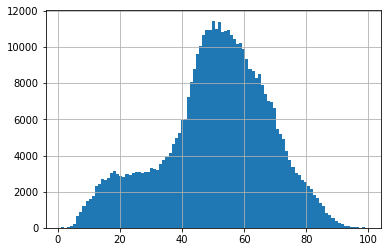

In [ ]:
hist_age1 = df2['edad'].hist(bins=df2['edad'].nunique())

La edad de las imágenes se encuentran más acumuladas entre el rango de 40 años y 70 años 

In [ ]:
df2.edad.value_counts()

50    11459
52    11361
51    10973
49    10962
55    10923
      ...  
96       31
97       25
99       17
2        10
98       10
Name: edad, Length: 99, dtype: int64

La edad que más datos tiene es 56 años con 11459 registros, las que menos datos tienen son 2 años y 98 años con 10 registros cada una.

También analizamos si este dataset obtenido presenta muchos outliers

In [ ]:
import seaborn as sns

[(0.0, 100.0)]

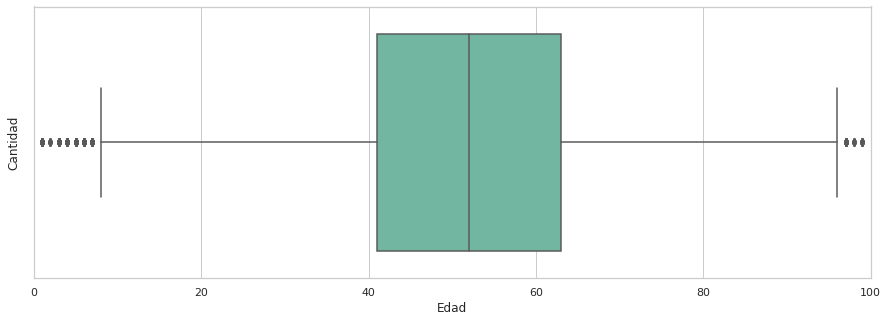

In [ ]:
sns.set(rc={'figure.figsize':(15,5)})
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df2["edad"], palette="Set2")
ax.set(xlabel='Edad',ylabel='Cantidad')
ax.set(xlim=(0,100))

Los outliers que se observan son para los datos cercanos a los 0 años y a los 100 años. Esto quiere decir, que para valores de estas edades no tenemos muchos registros, sin embargo, se consideran relevantes para este estudio y no son eliminados, así tendremos más información de las edades en todo el rango de 0 a 100 años.

**7.** Finalmente, se ha realizado un preprocesado de los datos y se genera un nuevo dataframe df2

In [ ]:
df2.head()

,nombre_foto,edad
0,anonymized_846.jpg,54
1,anonymized_847.jpg,54
2,anonymized_848.jpg,54
3,anonymized_868.jpg,59
4,anonymized_1033.jpg,58


La dimensión del df2 es

In [ ]:
df2.shape

(437394, 2)

Cabe mencionar que la cantidad de datos todavía es muy grande, subir los archivos de las imágenes a Google Drive es un trabajo de muchas horas, al mismo tiempo si se quieren realizar las ejecuciones de diferentes modelos va a requerrir muchos recursos y tiempo de ejecución (esto basado en la realización del trabajo final de la asignatura de Aprendizaje Profundo, donde el tiempo de ejecución que tomó realizar la implementación de varios modelos para un dataset de 39.100 imágenes fue de 20 - 35 minutos por modelo), se tomó la decisión de considerar aproximadamente sólo el 10% del total de los datos, esto es, aproximadamente 43 mil imágenes.

En consecuencia, después del preprocesado, se han obtenido 437394 datos. Para reducir la cantidad de datos, se utiliza como estrategia realizar una *estratificación* de los datos originales para tener una muestra representativa de los mismos. 

Por consiguiente, se define la siguiente función que permite estratificar el dataset original

In [ ]:
# the functions:
def stratified_sample(df, strata, size=None, seed=None, keep_index= True):
    '''
    It samples data from a pandas dataframe using strata. These functions use
    proportionate stratification:
    n1 = (N1/N) * n
    where:
        - n1 is the sample size of stratum 1
        - N1 is the population size of stratum 1
        - N is the total population size
        - n is the sampling size
    Parameters
    ----------
    :df: pandas dataframe from which data will be sampled.
    :strata: list containing columns that will be used in the stratified sampling.
    :size: sampling size. If not informed, a sampling size will be calculated
        using Cochran adjusted sampling formula:
        cochran_n = (Z**2 * p * q) /e**2
        where:
            - Z is the z-value. In this case we use 1.96 representing 95%
            - p is the estimated proportion of the population which has an
                attribute. In this case we use 0.5
            - q is 1-p
            - e is the margin of error
        This formula is adjusted as follows:
        adjusted_cochran = cochran_n / 1+((cochran_n -1)/N)
        where:
            - cochran_n = result of the previous formula
            - N is the population size
    :seed: sampling seed
    :keep_index: if True, it keeps a column with the original population index indicator
    
    Returns
    -------
    A sampled pandas dataframe based in a set of strata.
    Examples
    --------
    >> df.head()
    	id  sex age city 
    0	123 M   20  XYZ
    1	456 M   25  XYZ
    2	789 M   21  YZX
    3	987 F   40  ZXY
    4	654 M   45  ZXY
    ...
    # This returns a sample stratified by sex and city containing 30% of the size of
    # the original data
    >> stratified = stratified_sample(df=df, strata=['sex', 'city'], size=0.3)
    Requirements
    ------------
    - pandas
    - numpy
    '''
    population = len(df)
    size = __smpl_size(population, size)
    tmp = df[strata]
    tmp['size'] = 1
    tmp_grpd = tmp.groupby(strata).count().reset_index()
    tmp_grpd['samp_size'] = round(size/population * tmp_grpd['size']).astype(int)

    # controlling variable to create the dataframe or append to it
    first = True 
    for i in range(len(tmp_grpd)):
        # query generator for each iteration
        qry=''
        for s in range(len(strata)):
            stratum = strata[s]
            value = tmp_grpd.iloc[i][stratum]
            n = tmp_grpd.iloc[i]['samp_size']

            if type(value) == str:
                value = "'" + str(value) + "'"
            
            if s != len(strata)-1:
                qry = qry + stratum + ' == ' + str(value) +' & '
            else:
                qry = qry + stratum + ' == ' + str(value)
        
        # final dataframe
        if first:
            stratified_df = df.query(qry).sample(n=n, random_state=seed).reset_index(drop=(not keep_index))
            first = False
        else:
            tmp_df = df.query(qry).sample(n=n, random_state=seed).reset_index(drop=(not keep_index))
            stratified_df = stratified_df.append(tmp_df, ignore_index=True)
    
    return stratified_df



def stratified_sample_report(df, strata, size=None):
    '''
    Generates a dataframe reporting the counts in each stratum and the counts
    for the final sampled dataframe.
    Parameters
    ----------
    :df: pandas dataframe from which data will be sampled.
    :strata: list containing columns that will be used in the stratified sampling.
    :size: sampling size. If not informed, a sampling size will be calculated
        using Cochran adjusted sampling formula:
        cochran_n = (Z**2 * p * q) /e**2
        where:
            - Z is the z-value. In this case we use 1.96 representing 95%
            - p is the estimated proportion of the population which has an
                attribute. In this case we use 0.5
            - q is 1-p
            - e is the margin of error
        This formula is adjusted as follows:
        adjusted_cochran = cochran_n / 1+((cochran_n -1)/N)
        where:
            - cochran_n = result of the previous formula
            - N is the population size
    Returns
    -------
    A dataframe reporting the counts in each stratum and the counts
    for the final sampled dataframe.
    '''
    population = len(df)
    size = __smpl_size(population, size)
    tmp = df[strata]
    tmp['size'] = 1
    tmp_grpd = tmp.groupby(strata).count().reset_index()
    tmp_grpd['samp_size'] = round(size/population * tmp_grpd['size']).astype(int)
    return tmp_grpd


def __smpl_size(population, size):
    '''
    A function to compute the sample size. If not informed, a sampling 
    size will be calculated using Cochran adjusted sampling formula:
        cochran_n = (Z**2 * p * q) /e**2
        where:
            - Z is the z-value. In this case we use 1.96 representing 95%
            - p is the estimated proportion of the population which has an
                attribute. In this case we use 0.5
            - q is 1-p
            - e is the margin of error
        This formula is adjusted as follows:
        adjusted_cochran = cochran_n / 1+((cochran_n -1)/N)
        where:
            - cochran_n = result of the previous formula
            - N is the population size
    Parameters
    ----------
        :population: population size
        :size: sample size (default = None)
    Returns
    -------
    Calculated sample size to be used in the functions:
        - stratified_sample
        - stratified_sample_report
    '''
    if size is None:
        cochran_n = round(((1.96)**2 * 0.5 * 0.5)/ 0.02**2)
        n = round(cochran_n/(1+((cochran_n -1) /population)))
    elif size >= 0 and size < 1:
        n = round(population * size)
    elif size < 0:
        raise ValueError('Parameter "size" must be an integer or a proportion between 0 and 0.99.')
    elif size >= 1:
        n = size
    return n

Se carga la muestra estratificada obtenida a partir de la función `stratified_sample` como el 10% de los datos del dataframe df2. 

In [ ]:
sample_df = pd.read_csv(pathDataframes/'sample_df.csv', sep=',')

In [ ]:
sample_df.head(10)

,nombre_foto,edad
0,anonymized_597149.jpg,1
1,anonymized_1233130.jpg,1
2,anonymized_597132.jpg,1
3,anonymized_624984.jpg,1
4,anonymized_285161.jpg,2
5,anonymized_165940.jpg,3
6,anonymized_165946.jpg,3
7,anonymized_165951.jpg,3
8,anonymized_806137.jpg,3
9,anonymized_510058.jpg,4


Esto implica que en este proceso se pierden datos e información, pero definitivamente, es el tamaño de muestra que se busca.

La dimensión del dataset es

In [ ]:
sample_df.shape

(43739, 2)

Este dataframe contiene 43739 instancias y 2 campos. 

El dataframe estratificado `sample_df` se visualiza de la siguiente manera

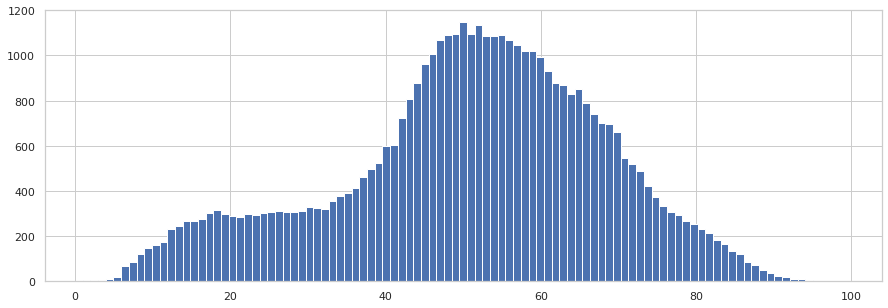

In [ ]:
hist_age2 =sample_df['edad'].hist(bins=sample_df['edad'].nunique())

**FALTA comparar las graficas y mostrar que están estratificadas**

In [ ]:
# We start by importing matplotlib
import matplotlib.pyplot as plt

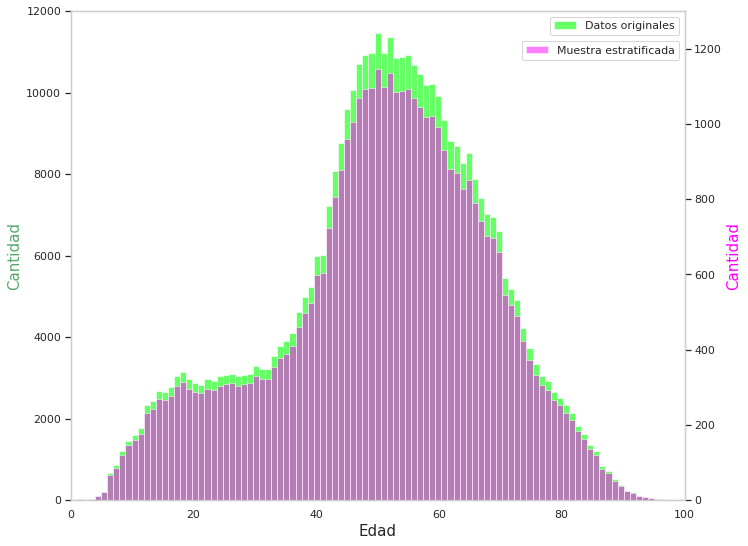

<Figure size 1080x360 with 0 Axes>

In [ ]:
# Plotting a figure of width 6 and height 3
plt.figure(figsize=(11, 9))

ax1 = df2['edad'].hist(bins=df2['edad'].nunique(), alpha=0.6,grid = False, label="Datos originales", color = 'lime')
ax1.set_xlim(0,100)
ax1.set_ylim(0,12000)

ax2 = ax1.twinx()
#ax2 = plt.subplot(132)
ax2 = sample_df['edad'].hist(bins=sample_df['edad'].nunique(), alpha=0.5, grid = False, label="Muestra estratificada", color = 'magenta')
ax2.set_xlim(0, 100)
ax2.set_ylim(0,1300)

ax1.set_xlabel('Edad', size = 15)
ax1.set_ylabel('Cantidad', color='g', size = 15)
ax2.set_ylabel('Cantidad', color='magenta', size = 15)

ax1.legend(loc='upper right', bbox_to_anchor=(0.5, 0.5, 0.5, 0.5))
ax2.legend(loc='upper right', bbox_to_anchor=(0.5, 0.45, 0.5, 0.5))

plt.show()

Por ende, a partir del dataframe se quieren construir los conjuntos de training y testing, pero, con el fin, de que ambos conjuntos, sean muestras representativas del dataset, se busca que tengan la misma distribución del datos, es decir,ambos conjuntos se quieren estratificados.

Para ello, se utilizó el método `train_test_split` de la librería scikit-learn con el **atributo** stratify, sin embargo, se genera un error porque hay edades en las cuales, sólo hay un valor y como se quieren distribur los datos a dos conjuntos, esto no es posible. 

No obstante, se utiliza este método con valor None y se observa en el histograma del conjunto de train y de test, una distribución de los datos muy similar a los datos originales. 

Por tal motivo, se consideran las particiones de los conjuntos realizadas por este método. 

Por último, se quieren guardar las imágenes del dataframe dfTrain y dfTest en carpetas. Teniendo esto en mente, se deben cargar los archivos de las imágenes originales 444 mil imágenes y extraer 35 mil para training y 8 mil para testing.

Por razones de memoria y para evitar cargar el dataset de las 444 mil imágenes, en este intento, este proceso tomó muchas horas de ejecución e incluso, el ordenador colapsa y se debe reiniciar en muchas ocasiones, se decide realizar este proceso de forma local.

Finalmente, se obtienen los datasets con los archivos de training y split y se pueden cargar las imágenes. Para el conjunto de test están todas las imágenes pero para el conjunto de training no se guardaron 3 de estas imágenes. 

Por lo que, se pasa a revisar los dataframes finales que se obtuvieron de forma local. 

Se cargan los dataframes dfTrain y dfTest

In [ ]:
dfTrain = pd.read_csv(pathDataframes/'train.csv')
dfTest = pd.read_csv(pathDataframes/'test.csv')

Se pueden ver las dimensiones de ambos conjuntos de datos

In [ ]:
print("Las dimensiones del conjunto de entrenamiento son = ", dfTrain.shape)
print("Las dimensiones del conjunto de prueba son = ", dfTest.shape)

Las dimensiones del conjunto de entrenamiento son =  (34991, 2)
Las dimensiones del conjunto de prueba son =  (8748, 2)


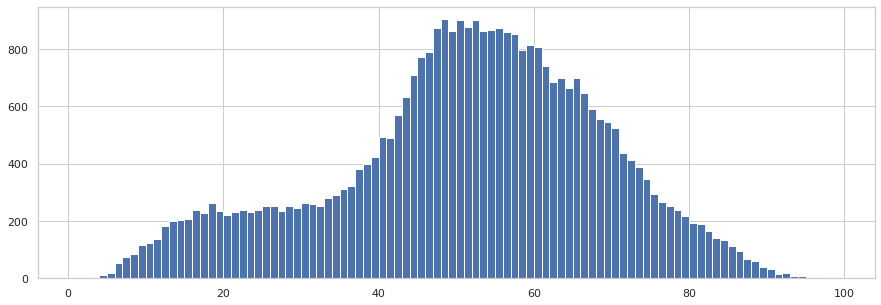

In [ ]:
hist_train =dfTrain['edad'].hist(bins=dfTrain['edad'].nunique())

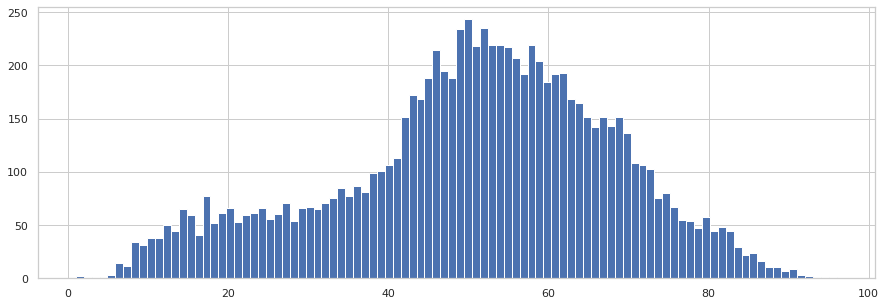

In [ ]:
hist_test =dfTest['edad'].hist(bins=dfTest['edad'].nunique())

Ahora bien, falta cargar los archivos de las imágenes de los conjuntos de datos de training y de testing. Se pueden crear objetos `path` que apunten respectivamente al conjunto de entrenamiento y al conjunto de test. 

In [ ]:
trainPath = pathDatasets/'nuevo_training'
testPath = pathDatasets/'nuevo_testing'

Se puede observar el contenido de cada uno de estos directorios 

In [ ]:
trainPath.ls()

(#34991) [Path('/content/drive/MyDrive/dataset_retina/datasets/nuevo_training/anonymized_9740.jpg'),Path('/content/drive/MyDrive/dataset_retina/datasets/nuevo_training/anonymized_1000305.jpg'),Path('/content/drive/MyDrive/dataset_retina/datasets/nuevo_training/anonymized_978980.jpg'),Path('/content/drive/MyDrive/dataset_retina/datasets/nuevo_training/anonymized_1001345.jpg'),Path('/content/drive/MyDrive/dataset_retina/datasets/nuevo_training/anonymized_1001957.jpg'),Path('/content/drive/MyDrive/dataset_retina/datasets/nuevo_training/anonymized_1002097.jpg'),Path('/content/drive/MyDrive/dataset_retina/datasets/nuevo_training/anonymized_1005146.jpg'),Path('/content/drive/MyDrive/dataset_retina/datasets/nuevo_training/anonymized_100760.jpg'),Path('/content/drive/MyDrive/dataset_retina/datasets/nuevo_training/anonymized_10189.jpg'),Path('/content/drive/MyDrive/dataset_retina/datasets/nuevo_training/anonymized_102768.jpg')...]

In [ ]:
testPath.ls()

(#8748) [Path('/content/drive/MyDrive/dataset_retina/datasets/nuevo_testing/anonymized_315568.jpg'),Path('/content/drive/MyDrive/dataset_retina/datasets/nuevo_testing/anonymized_312364.jpg'),Path('/content/drive/MyDrive/dataset_retina/datasets/nuevo_testing/anonymized_311154.jpg'),Path('/content/drive/MyDrive/dataset_retina/datasets/nuevo_testing/anonymized_311194.jpg'),Path('/content/drive/MyDrive/dataset_retina/datasets/nuevo_testing/anonymized_310355.jpg'),Path('/content/drive/MyDrive/dataset_retina/datasets/nuevo_testing/anonymized_310162.jpg'),Path('/content/drive/MyDrive/dataset_retina/datasets/nuevo_testing/anonymized_308853.jpg'),Path('/content/drive/MyDrive/dataset_retina/datasets/nuevo_testing/anonymized_308676.jpg'),Path('/content/drive/MyDrive/dataset_retina/datasets/nuevo_testing/anonymized_307382.jpg'),Path('/content/drive/MyDrive/dataset_retina/datasets/nuevo_testing/anonymized_305540.jpg')...]

Se puede ver que tanto la carpeta `trainPath` como la carpeta `testPath` contiene las imágenes en formato jpg.